# Ridge and Lasso Regression

In [2]:
#importing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [3]:
df= load_boston()
dataset= pd.DataFrame(df.data)


In [4]:
dataset.columns= df.feature_names


In [5]:
df.target.shape

(506,)

In [6]:
dataset['Price']= df.target
X= dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]


# Linear Regression

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_regressor= LinearRegression()
mse= cross_val_score(lin_regressor, X, y, scoring= "neg_mean_squared_error", cv= 5)
mean_mse= np.mean(mse)
print(mean_mse)

-37.13180746769922


# Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={
    'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,30,35,40,45,50,55,100,150,200]
}
ridge_reg=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_reg.fit(X,y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(ridge_reg.best_params_)

{'alpha': 150}


In [19]:
print(ridge_reg.best_estimator_)

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [20]:
print(ridge_reg.best_score_)

-29.72105329387374


# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [22]:
lasso = Lasso()
params= {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,30,35,40,45,50,55,100,150,200]}
lasso_regressor= GridSearchCV(lasso, params,scoring= "neg_mean_squared_error", cv= 5)
lasso_regressor.fit(X, y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print(lasso_regressor.best_params_)

{'alpha': 0.1}


In [25]:
print(lasso_regressor.best_score_)

-34.78377459082821


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)
prediction_lasso= lasso_regressor.predict(X_test)
prediction_ridge= ridge_reg.predict(X_test)


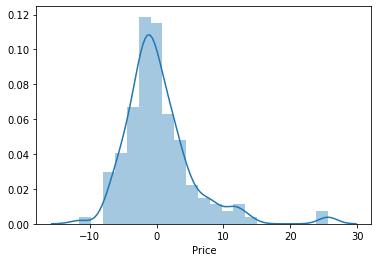

In [27]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

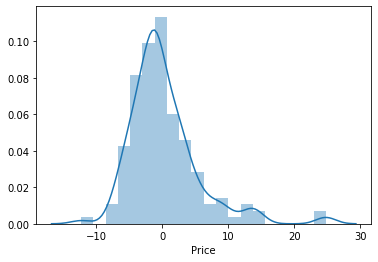

In [28]:
sns.distplot(y_test-prediction_ridge)

Both the graphs of ridge and Lasso regression are almost similiar but graph of ridge looks more stable and that indicates more generalized model prediction.